In [26]:
import matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from read_data import read_parafac_result, get_filelist
from ipywidgets import Text, Layout

In [2]:
filepath = "_data/_waterwall/_output/Chlorine_disrupt_2_R3.txt"
ex_df, em_df, score_df, info_dict = read_parafac_result(filepath) 

Reading fluorescence measurement info...
Reading Ex/Em loadings...
Reading component scores...
Reading complete


In [3]:
info_dict

{'name': '',
 'creator': 'Yongmin Hu',
 'email': '',
 'doi ISBN': '',
 'reference': '',
 'unit': '',
 'toolbox': 'EEM_python_toolkit',
 'date': '2022-01-06',
 'fluorometer': 'Horiba Aqualog',
 'nSample': '19',
 'dateset_calibration': 'Internal calibration: Raman Peak area',
 'preprocess': 'Inner_filter_effect, Rayleigh scattering masking, Gaussian smoothing.',
 'decomposition_method': 'non_negative_parafac',
 'validation': '',
 'sources': '',
 'description': ''}

In [5]:
filedir_default = "_data/_waterwall/_output"
# dir_selection = Text(value=filedir_default,
#                                 description='File directory',
#                                 layout=Layout(width='100%'))
# display(dir_selection)

def collect_parafac_result(datdir,kw):
    datlist = get_filelist(datdir, kw)
    parafac_results = []
    for f in datlist:
        filepath = datdir + '/' + f
        ex_df, em_df, score_df, info_dict = read_parafac_result(filepath)
        d = {'filename':f ,'info':info_dict, 'ex': ex_df, 'em': em_df, 'score':score_df}
        parafac_results.append(d)
    return parafac_results

parafac_results = collect_parafac_result(filedir_default, 'R3')

Reading fluorescence measurement info...
Reading Ex/Em loadings...
Reading component scores...
Reading complete
Reading fluorescence measurement info...
Reading Ex/Em loadings...
Reading component scores...
Reading complete


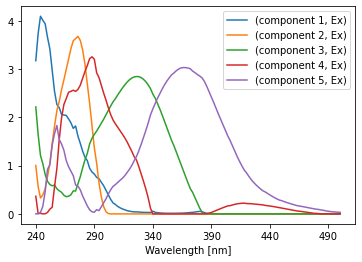

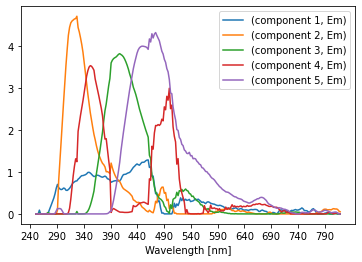

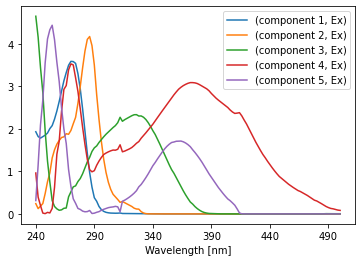

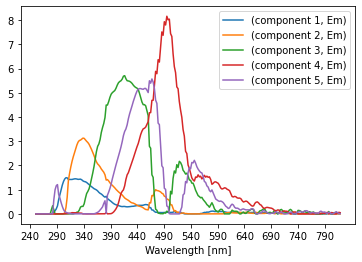

In [31]:
# compare spectra

for d in parafac_results:
    J_df = d['ex']
    K_df = d['em']
    ex_range = [w[1] for w in J_df.index]
    em_range = [w[1] for w in K_df.index]
    fig_ex = J_df.unstack(level=0).plot.line()
    handles_ex, labels_ex = fig_ex.get_legend_handles_labels()
    plt.legend(handles_ex, labels_ex, prop={'size': 10})
    plt.xticks(np.arange(ex_range[0], ex_range[-1] + 1, 50))
    plt.xlabel("Wavelength [nm]")
    fig_em = K_df.unstack(level=0).plot.line()
    handles_em, labels_em = fig_em.get_legend_handles_labels()
    plt.legend(handles_em, labels_em, prop={'size': 10})
    plt.xticks(np.arange(ex_range[0], em_range[-1], 50))
    plt.xlabel("Wavelength [nm]")


In [29]:
ex_range = [w[1] for w in J_df.index]